# Observations on Bubble Detection

In [798]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 


In [799]:
def build_grid(img, grid_size = (100,100), line_color =(255, 0, 0) ):

    # Iterate over the rows and columns to draw the lines
    for i in range(0, img.shape[0], grid_size[0]):
        cv2.line(img, (0, i), (img.shape[1], i), line_color, 1)
    for j in range(0, img.shape[1], grid_size[1]):
        cv2.line(img, (j, 0), (j, img.shape[0]), line_color, 1)
    return img
def plot_images(img1, img2):
    img1 = build_grid(img1)
    img2 = build_grid(img2)
    f = plt.figure(figsize = (15,10))
    f.add_subplot(1,2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    f.add_subplot(1,2, 2)

    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
   
    plt.show(block=True)

def mask(img, lower_threshold = 150, upper_threshold = 250):
    
    # Create the mask for bright pixels
    mask = cv2.inRange(img, lower_threshold, upper_threshold)
    # Apply the mask to the original image to show only bright pixels
    return cv2.bitwise_and(img, img, mask=mask)

def mask_color(img, lower_bound:list, upper_bound:list):
    lower_bound = np.array(lower_bound, dtype = "uint8") 
    upper_bound = np.array(upper_bound, dtype = "uint8")
    mask = cv2.inRange(img, lower_bound, upper_bound)
    return cv2.bitwise_and(img, img, mask =  mask) 
    

In [800]:
# m1 = mask_color(cv2.imread(r'Data\1.png'), [100,100,100], [200,200,200])
# m2 = mask(mask(cv2.cvtColor(cv2.imread(r'Data\1.png'),cv2.COLOR_BGR2GRAY), 100,140))

# cv2.imshow("frame", m1-m2 )

In [801]:

img = mask_color(cv2.imread(r'Data\1.png'), [141,141,121], [150,150,220])
cv2.imshow("frame", img)
cv2.waitKey(0)
cv2.imwrite("121_200_bgr.jpeg", img)

True

In [802]:
# cam = cv2.VideoCapture("Data\plant.mp4")
# total_frames = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))
# skip_rate = 20
# for i in range(0, total_frames, skip_rate):
#     cam.set(cv2.CAP_PROP_POS_FRAMES, i)
#     ret, frame = cam.read()
#     # print('Position:', int(cam.get(cv2.CAP_PROP_POS_FRAMES)))
#     if frame is None or not ret:
#         break
#     # cv2.imshow("frame", cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
#     # cv2.waitKey(0)
#     mask_image = mask(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY), 100,140)
#     # print(mask_image)
#     # print(mask_image.shape)
#     # print(frame.shape)
    
#     plot_images(frame, mask_image)
    
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break
# cam.release()
# cv2.destroyAllWindows()


# Observations

<li>The reflection of light on the cylinders is significant and is affecting the masked images</li>
<li>We can paint the rods to dark color so as it doesnt get detected</li>
<li>Bubbles are mostly detected in 100 to 150 range</li>

# Detecting Circles

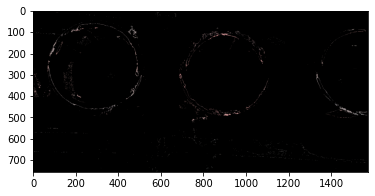

In [803]:
# img = cv2.medianBlur(img,5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
image = img.copy()


Performing edge detection to bold out the circles

In [804]:
def merge_circles(circles):
    x = 0
    y = 0
    r = 0
    for circle in circles:
        x += circle[0]
        y += circle[1]
        r = max(r, circle[2])
    x /= len(circles)
    y /= len(circles)
    return (int(x), int(y), int(r))

In [805]:



# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur to reduce noise
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# # Apply Canny edge detection
# edges = cv2.Canny(blurred, 200, 300)

# # Detect circular arcs using Hough Transform
# circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# # Check if any circles were detected
# if circles is not None:
#     # Convert the (x, y) coordinates and radius of the circles to integers
#     circles = np.round(circles[0, :]).astype("int")

#     # Loop over the circles
#     for (x, y, r) in circles:
#         # Draw the circle in the output image
#         cv2.circle(img, (x, y), r, (0, 255, 0), 2)

# # Display the output image
# cv2.imshow("Circular Arcs", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [806]:
# import cv2
# import numpy as np

# # Load the input image

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur to reduce noise
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# # Apply Canny edge detection
# edges = cv2.Canny(blurred, 300, 400)

# # Detect circular arcs using Hough Transform
# circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=100, maxRadius=300)

# # Check if any circles were detected
# if circles is not None:
#     # Convert the (x, y) coordinates and radius of the circles to integers
#     circles = np.round(circles[0, :]).astype("int")

#     # Initialize a list to store the filtered circles
#     filtered_circles = []

#     # Loop over the circles
#     for (x, y, r) in circles:
#         # Initialize a flag to indicate whether the circle has been filtered
#         filtered = False

#         # Loop over the filtered circles
#         for (fx, fy, fr) in filtered_circles:
#             # Calculate the distance between the centers of the circles
#             d = np.sqrt((x - fx)**2 + (y - fy)**2)

#             # If the distance is smaller than the sum of their radii, remove the circle with the smaller radius
#             if d < r + fr:
#                 filtered = True
#                 if r < fr:
#                     break

#         # If the circle was not filtered, add it to the list of filtered circles
#         if not filtered:
#             filtered_circles.append((x, y, r))

#     # Draw the filtered circles in the output image
#     for (x, y, r) in filtered_circles:
#         cv2.circle(img, (x, y), r, (0, 255, 0), 2)

# # Display the output image
# cv2.imshow("Filtered Circles", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [807]:
import cv2
import numpy as np

# Load the input image

# Convert the image to grayscale

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 200, 300)

# Detect circular arcs using Hough Transform
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)


filtered_circles = []

# Loop over the circles


if circles is not None:
    # Convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round( circles[0, :]).astype("int")
    for (x, y, r) in circles:
    # Initialize a flag to indicate whether the circle has been filtered
        filtered = False

        # Loop over the filtered circles
        for (fx, fy, fr) in filtered_circles:
            # Calculate the distance between the centers of the circles
            d = np.sqrt((x - fx)**2 + (y - fy)**2)

            # If the distance is smaller than the sum of their radii, remove the circle with the smaller radius
            if d < r + fr:
                filtered = True
                if r < fr:
                    break

        # If the circle was not filtered, add it to the list of filtered circles
        if not filtered:
            filtered_circles.append((x, y, r))
                
    

    print(circles)
    print(circles.shape)
    print("___________filtered________")
    print(filtered_circles)
    circles = filtered_circles
    # for (x, y, r) in circles:
    #     cv2.circle(image, (x, y), r, (0, 255, 0), 2)
    # Initialize a list to store the centers of the circles
    # centers = []

    # # Loop over the circles
    # for (x, y, r) in circles:
    #     centers.append([x, y])

    # # Convert the list of centers to a NumPy array
    # centers = np.array(centers, dtype=np.float32)

    # # Perform KMeans clustering on the centers of the circles
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # flags = cv2.KMEANS_RANDOM_CENTERS
    # compactness, labels, centers = cv2.kmeans(centers, K=2, bestLabels=None, criteria=criteria, attempts=10, flags=flags)

    # # Initialize a dictionary to store the clustered circles
    # clustered_circles = {}
    # # print(circles)
    # # print(circles.shape)
    # # print(labels)
    # # print(labels.shape)
   

    # # Loop over the labels and circles
    # for label, (x, y, r) in zip(labels, circles):
    #     # If the label is not in the dictionary, add it
    #     # print(label[0])
    #     if label[0] not in clustered_circles.keys():
    #         clustered_circles[label[0]] = []

    #     # Add the circle to the list for the corresponding label
    #     clustered_circles[label[0]].append((x, y, r))
    
    # print("________________Clusters__________")
    # print(clustered_circles)

    # Draw the clustered circles in the output image
    colors = [(0, 255, 255), (255, 0, 255),(255, 0, 0), (255, 255, 0), (0, 0, 255)]
    
    # final_circles = [merge_circles(clustered_circles[key]) for key in clustered_circles.keys()]
    
    # print("___________________Final________________")
    # print(final_circles)
    
    for id, circle in enumerate(circles):
        color = colors[id % len(colors)]
        x,y,r = circle
        cv2.circle(image, (x, y), r, color, 2)

        

# Display the output image
cv2.imshow("Clustered Circles", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[ 272  274  198]
 [ 862  304  202]
 [ 302  304  237]
 [ 912  304  179]
 [ 332  304  156]
 [ 272  304  212]
 [1488  304  150]
 [ 232  304  136]
 [ 804  304  195]]
(9, 3)
___________filtered________
[(272, 274, 198), (862, 304, 202), (1488, 304, 150)]


In [808]:
# kernel = np.ones((5, 5), np.uint8)
# img_dilation = cv2.dilate(img, kernel, iterations=3)

In [809]:
# plt.imshow(img_dilation)

In [810]:
# gray = cv2.cvtColor(img_dilation, cv2.COLOR_RGB2GRAY)

In [811]:
# plt.imshow(gray)

In [812]:
print(circles)
len(circles)

[(272, 274, 198), (862, 304, 202), (1488, 304, 150)]


3